# Model Selection

In [1]:
from scipy.io import loadmat
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

# Self-defined functions
from warpped.collection import load_simimat, mean_simi, mean_simi_mat
from warpped.collection import parse_chronnectome
from warpped.collection import replace_global, create_figure_dirs
from warpped.global_variables import hmminfo_source, base, behav_dir
from warpped.global_variables import sub_num, total_reps, K_max
from warpped.figures import fig_set


In [2]:
# Global settings
sns.set_style("white")
pd.set_option('display.max_columns',1000)
pd.set_option('display.max_row',300)

## Select K 
``` matlab
value = getGammaSimilarity(gamma{i}, gamma{j})

simi_matrix(i,j)=value; simi_matrix(j,i)=value
```

In [3]:
mean_simi_df = mean_simi_mat(range(1, K_max), base)

Text(108.0, 0.5, 'Mean Similarity')

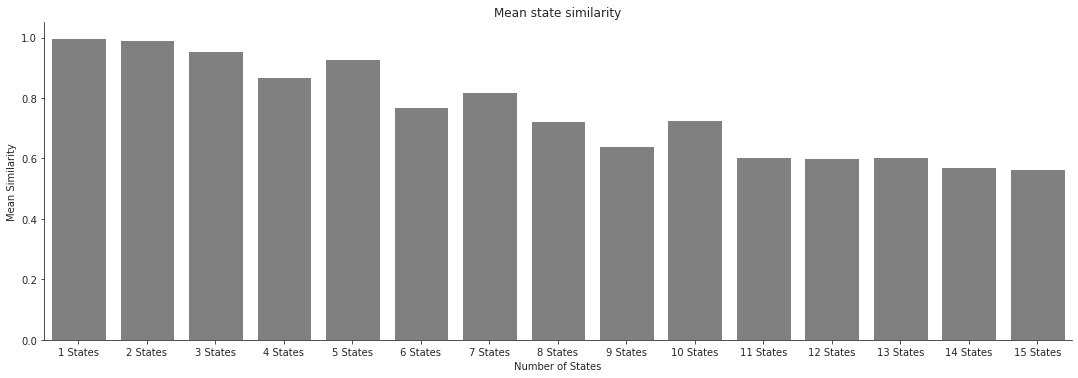

In [4]:
plt.figure(figsize=(15,5))
fig_set()
plt.title("Mean state similarity")
sns.barplot(x='State', y='Mean_simi', data=mean_simi_df, color="gray")
plt.xlabel('Number of States')
plt.ylabel('Mean Similarity')

In [5]:
K_state = 7 # select K
replace_global("K_state", K_state)

## Select Reptition

In [6]:
state_simimat=load_simimat(K_state, base)

<AxesSubplot:>

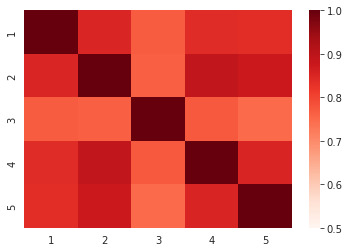

In [7]:
sns.heatmap(pd.DataFrame(state_simimat, index=range(1,6), columns=range(1,6)), cmap='Reds', vmin=0.5)

Text(0.5, 1.0, 'Mean Similarity for Each Reptition')

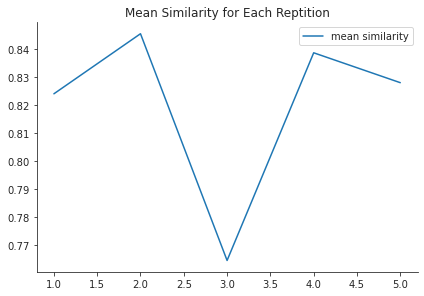

In [8]:
pd.DataFrame((state_simimat.sum(axis=1)-1)/4, index=range(1,6), columns=['mean similarity']).plot()
fig_set()
plt.title("Mean Similarity for Each Reptition")

In [9]:

maxfo_array = np.array([]); switch_array = maxfo_array.copy()
rep_index= np.repeat([i for i in range(1, total_reps+1)],sub_num)

for r in range(total_reps):
    hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{r+1}.mat'
    info_array=loadmat(hmminfo_file)[hmminfo_source]
    sr, mf = parse_chronnectome(info_array, model_selection=True)
    switch_array = np.concatenate((switch_array, sr))
    maxfo_array = np.concatenate((maxfo_array, mf))
    
switching_rate_df = pd.DataFrame(np.array([rep_index, switch_array]).T, columns=['rep_num', 'Switching Rates']) 
maxfo_df = pd.DataFrame(np.array([rep_index, maxfo_array]).T, columns=['rep_num', 'Max FO']) 

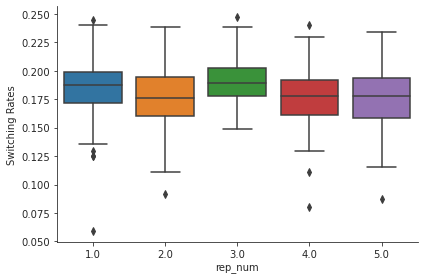

In [10]:
sns.boxplot(x='rep_num', y='Switching Rates', data=switching_rate_df)
fig_set()

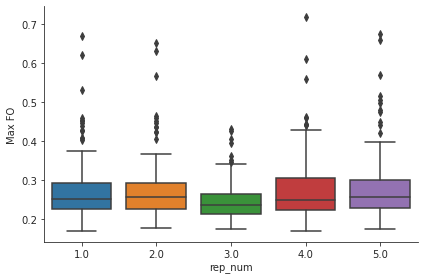

In [11]:
sns.boxplot(x='rep_num', y='Max FO', data=maxfo_df)
fig_set()

In [12]:
rep_num = 3
replace_global("rep_num", rep_num)
hmm_file = base+f'chronotype_k{K_state}_rep_{rep_num}.mat'
hmminfo_file = base+f'hmminfo/hmminfo_k{K_state}_rep_{rep_num}.mat'
hmminfo_file

'/home/jzni/dissertation/analysis/output/hmminfo/hmminfo_k7_rep_3.mat'

In [13]:
create_figure_dirs(K_state, rep_num)